In [1]:
#%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
city_ride_merged = pd.merge(ride,city,on = "city")
# Display the data table for preview
city_ride_merged.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
city.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
#Get the total numbers of Rides per City and create a summary_city data frame
rides_per_city = pd.DataFrame(ride["city"].value_counts())
rides_per_city = rides_per_city.rename(columns = {"city":"Total Rides"})
rides_per_city["city"] = rides_per_city.index
summary_city = pd.merge(city,rides_per_city,on = "city")

#Get the Total Fare ($) and add it to the summary_city data frame
average_city_fare = pd.DataFrame(ride.groupby(["city"])["fare"].sum())
average_city_fare = average_city_fare.rename(columns = {"fare":"Total Fare"})
average_city_fare["city"] = average_city_fare.index
summary_city = pd.merge(summary_city,average_city_fare, on = "city")

#Get the Average Fare and add it to the summary_city data frame
summary_city["Avg Fare"] = summary_city["Total Fare"] / summary_city["Total Rides"]
summary_city.head()

,city,driver_count,type,Total Rides,Total Fare,Avg Fare
0,Richardfort,38,Urban,28,626.45,22.373214
1,Williamsstad,59,Urban,23,560.33,24.362174
2,Port Angela,67,Urban,19,452.90,23.836842
3,Rodneyfort,34,Urban,23,658.19,28.616957
4,West Robert,39,Urban,31,778.84,25.123871


## Bubble Plot of Ride Sharing Data

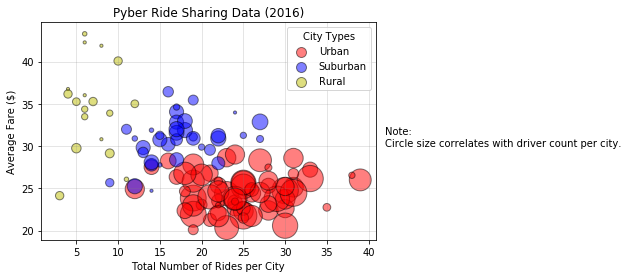

In [11]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types

for city_type in ["Urban","Suburban","Rural"]:
    x = summary_city.loc[summary_city["type"] == city_type,"Total Rides"]
    y = summary_city.loc[summary_city["type"] == city_type,"Avg Fare"]
    size = summary_city.loc[summary_city["type"] == city_type,"driver_count"]*10
    type_color = ["r" if city_type == "Urban" else "b" if city_type == "Suburban" else "y"]
    plt.scatter(x,y,facecolors = type_color, edgecolors = "black", s = size, alpha = 0.5, label = city_type)

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid(color = "grey",alpha = 0.25)

# Create a legend

lgd = plt.legend(title = "City Types")
for handle in lgd.legendHandles:
    handle.set_sizes([100])


# Incorporate a text label regarding circle size
plt.text(42,30,"Note:\nCircle size correlates with driver count per city.")
# Save Figure
plt.savefig("Pyber Ride Sharing Data 2016.png")

In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

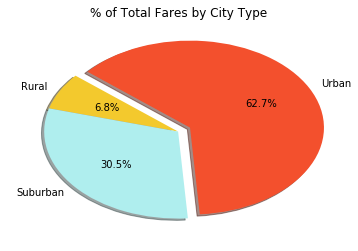

In [12]:
# Calculate Type Percents
grouped_city = summary_city.groupby("type")
total_fare = grouped_city["Total Fare"].sum()
colours = ["#F3C92D","#afeeee","#F3502D"]
explode = [0,0,0.1]
# Build Pie Chart
plt.pie(total_fare,labels = total_fare.index, explode = explode, autopct = "%.1f%%",colors = colours, startangle = 140,shadow = True)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("Total Fares by City Type.png")

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

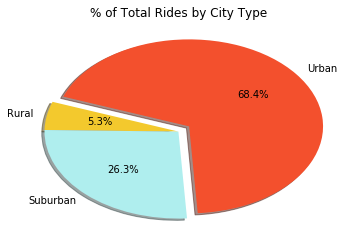

In [13]:
# Calculate Ride Percents
total_rides = grouped_city["Total Rides"].sum()
# Build Pie Chart
plt.pie(total_rides, labels = total_rides.index, colors = colours, autopct = "%.1f%%", shadow = True, explode = explode, startangle = 160)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Total Rides by City Type.png")

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

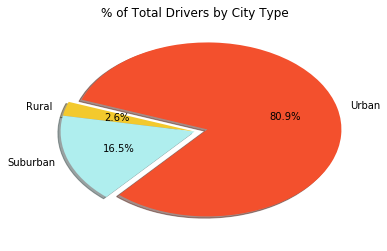

In [14]:
# Calculate Driver Percents
total_drivers = grouped_city["driver_count"].sum()
# Build Pie Charts
plt.pie(total_drivers, labels = total_rides.index, colors = colours, autopct = "%.1f%%", shadow = True, explode = explode, startangle = 160)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("Total Drivers by City Type")

In [ ]:
# Show Figure
plt.show()